# Coursera Capstone Project
Zi Yi Mok

In [1]:
##import required libraries
import pandas as pd
import pylab as pl
import numpy as np
import scipy.optimize as opt
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from datetime import datetime

%matplotlib inline 
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
##read csv
df = pd.read_csv("Data-Collisions.csv")

C:\Users\User\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3071: DtypeWarning: Columns (32) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


In [3]:
df.head()

,SEVERITYCODE,X,Y,OBJECTID,INCKEY,COLDETKEY,REPORTNO,STATUS,ADDRTYPE,INTKEY,...,ROADCOND,LIGHTCOND,PEDROWNOTGRNT,SDOTCOLNUM,SPEEDING,ST_COLCODE,ST_COLDESC,SEGLANEKEY,CROSSWALKKEY,HITPARKEDCAR
0,2,-122.323148,47.703140,1,1307,1307,3502005,Matched,Intersection,37475.0,...,Wet,Daylight,NaN,NaN,NaN,10,Entering at angle,0,0,N
1,1,-122.347294,47.647172,2,52200,52200,2607959,Matched,Block,NaN,...,Wet,Dark - Street Lights On,NaN,6354039.0,NaN,11,From same direction - both going straight - bo...,0,0,N
2,1,-122.334540,47.607871,3,26700,26700,1482393,Matched,Block,NaN,...,Dry,Daylight,NaN,4323031.0,NaN,32,One parked--one moving,0,0,N
3,1,-122.334803,47.604803,4,1144,1144,3503937,Matched,Block,NaN,...,Dry,Daylight,NaN,NaN,NaN,23,From same direction - all others,0,0,N
4,2,-122.306426,47.545739,5,17700,17700,1807429,Matched,Intersection,34387.0,...,Wet,Daylight,NaN,4028032.0,NaN,10,Entering at angle,0,0,N


In [4]:
df.describe(include="all")

,SEVERITYCODE,X,Y,OBJECTID,INCKEY,COLDETKEY,REPORTNO,STATUS,ADDRTYPE,INTKEY,...,ROADCOND,LIGHTCOND,PEDROWNOTGRNT,SDOTCOLNUM,SPEEDING,ST_COLCODE,ST_COLDESC,SEGLANEKEY,CROSSWALKKEY,HITPARKEDCAR
count,194673.000000,189339.000000,189339.000000,194673.000000,194673.000000,194673.000000,194673,194673,192747,65070.000000,...,189661,189503,4667,1.149360e+05,9333,194655,189769,194673.000000,1.946730e+05,194673
unique,NaN,NaN,NaN,NaN,NaN,NaN,194670,2,3,NaN,...,9,9,1,NaN,1,115,62,NaN,NaN,2
top,NaN,NaN,NaN,NaN,NaN,NaN,1776526,Matched,Block,NaN,...,Dry,Daylight,Y,NaN,Y,32,One parked--one moving,NaN,NaN,N
freq,NaN,NaN,NaN,NaN,NaN,NaN,2,189786,126926,NaN,...,124510,116137,4667,NaN,9333,27612,44421,NaN,NaN,187457
mean,1.298901,-122.330518,47.619543,108479.364930,141091.456350,141298.811381,NaN,NaN,NaN,37558.450576,...,NaN,NaN,NaN,7.972521e+06,NaN,NaN,NaN,269.401114,9.782452e+03,NaN
std,0.457778,0.029976,0.056157,62649.722558,86634.402737,86986.542110,NaN,NaN,NaN,51745.990273,...,NaN,NaN,NaN,2.553533e+06,NaN,NaN,NaN,3315.776055,7.226926e+04,NaN
min,1.000000,-122.419091,47.495573,1.000000,1001.000000,1001.000000,NaN,NaN,NaN,23807.000000,...,NaN,NaN,NaN,1.007024e+06,NaN,NaN,NaN,0.000000,0.000000e+00,NaN
25%,1.000000,-122.348673,47.575956,54267.000000,70383.000000,70383.000000,NaN,NaN,NaN,28667.000000,...,NaN,NaN,NaN,6.040015e+06,NaN,NaN,NaN,0.000000,0.000000e+00,NaN
50%,1.000000,-122.330224,47.615369,106912.000000,123363.000000,123363.000000,NaN,NaN,NaN,29973.000000,...,NaN,NaN,NaN,8.023022e+06,NaN,NaN,NaN,0.000000,0.000000e+00,NaN
75%,2.000000,-122.311937,47.663664,162272.000000,203319.000000,203459.000000,NaN,NaN,NaN,33973.000000,...,NaN,NaN,NaN,1.015501e+07,NaN,NaN,NaN,0.000000,0.000000e+00,NaN


In [5]:
df.dtypes

SEVERITYCODE        int64
X                 float64
Y                 float64
OBJECTID            int64
INCKEY              int64
COLDETKEY           int64
REPORTNO           object
STATUS             object
ADDRTYPE           object
INTKEY            float64
LOCATION           object
EXCEPTRSNCODE      object
EXCEPTRSNDESC      object
SEVERITYDESC       object
COLLISIONTYPE      object
PERSONCOUNT         int64
PEDCOUNT            int64
PEDCYLCOUNT         int64
VEHCOUNT            int64
INCDATE            object
INCDTTM            object
JUNCTIONTYPE       object
SDOT_COLCODE        int64
SDOT_COLDESC       object
INATTENTIONIND     object
UNDERINFL          object
WEATHER            object
ROADCOND           object
LIGHTCOND          object
PEDROWNOTGRNT      object
SDOTCOLNUM        float64
SPEEDING           object
ST_COLCODE         object
ST_COLDESC         object
SEGLANEKEY          int64
CROSSWALKKEY        int64
HITPARKEDCAR       object
dtype: object

In [6]:
#due to system limitaion - unable to process so many records, only select records with years 2017, 2018 and 2019
Years = ['2017','2018','2019']
df=df[df['INCDATE'].str[:4].isin(Years)]

In [7]:
df.shape

(30704, 37)

# Data Cleaning

In [8]:
##drop description
df.drop(['SEVERITYDESC','SDOT_COLDESC','ST_COLDESC'], axis=1, inplace=True)

In [9]:
##drop identifiers not used to predict severity
df.drop(['OBJECTID','INCKEY','COLDETKEY','REPORTNO','STATUS','EXCEPTRSNCODE','EXCEPTRSNDESC','SDOTCOLNUM'], axis=1, inplace=True)

In [10]:
##drop location data as all are in Seattle
df.drop(['LOCATION','X','Y','INTKEY','SEGLANEKEY','CROSSWALKKEY'], axis=1, inplace=True)

In [11]:
##drop date and time
df.drop(['INCDATE','INCDTTM'], axis=1, inplace=True)

In [12]:
#show missing data for each variable
missing_data = df.isnull()
for column in missing_data.columns.values.tolist():
    print(column)
    print (missing_data[column].value_counts())
    print("")    

SEVERITYCODE
False    30704
Name: SEVERITYCODE, dtype: int64

ADDRTYPE
False    30555
True       149
Name: ADDRTYPE, dtype: int64

COLLISIONTYPE
False    29141
True      1563
Name: COLLISIONTYPE, dtype: int64

PERSONCOUNT
False    30704
Name: PERSONCOUNT, dtype: int64

PEDCOUNT
False    30704
Name: PEDCOUNT, dtype: int64

PEDCYLCOUNT
False    30704
Name: PEDCYLCOUNT, dtype: int64

VEHCOUNT
False    30704
Name: VEHCOUNT, dtype: int64

JUNCTIONTYPE
False    30190
True       514
Name: JUNCTIONTYPE, dtype: int64

SDOT_COLCODE
False    30704
Name: SDOT_COLCODE, dtype: int64

INATTENTIONIND
True     24568
False     6136
Name: INATTENTIONIND, dtype: int64

UNDERINFL
False    29161
True      1543
Name: UNDERINFL, dtype: int64

WEATHER
False    29092
True      1612
Name: WEATHER, dtype: int64

ROADCOND
False    29120
True      1584
Name: ROADCOND, dtype: int64

LIGHTCOND
False    29082
True      1622
Name: LIGHTCOND, dtype: int64

PEDROWNOTGRNT
True     30121
False      583
Name: PEDROWNOTGRNT,

In [13]:
##select only rows with non-missing ROADCOND, weather, road condition, light condition, addrtype
df = df[df['ADDRTYPE'].notna()]
df = df[df['WEATHER'].notna()]
df = df[df['ROADCOND'].notna()]
df = df[df['LIGHTCOND'].notna()]

In [14]:
##select only rows with SDOT_COLCODE with sufficient information
df = df[df['SDOT_COLCODE']!=0]

In [15]:
##replace missing values for COLLISIONTYPE as Other
df["COLLISIONTYPE"].replace(np.nan, 'Other', inplace=True)

In [16]:
##replace missing values for COLLISIONTYPE as Other
df["JUNCTIONTYPE"].replace(np.nan, 'Unknown', inplace=True)

In [17]:
##replace missing values for INATTENTIONIND as N, and replace Y as 1 and N as 0
df["INATTENTIONIND"].replace(np.nan, 'N', inplace=True)
df['INATTENTIONIND'] = df['INATTENTIONIND'].map({'Y': 1, 'N': 0})

In [18]:
##replace missing values for PEDROWNOTGRNT as N, and replace Y as 1 and N as 0
df["PEDROWNOTGRNT"].replace(np.nan, 'N', inplace=True)
df['PEDROWNOTGRNT'] = df['PEDROWNOTGRNT'].map({'Y': 1, 'N': 0})

In [19]:
##replace missing values for SPEEDING as N, and replace Y as 1 and N as 0
df["SPEEDING"].replace(np.nan, 'N', inplace=True)
df['SPEEDING'] = df['SPEEDING'].map({'Y': 1, 'N': 0})

In [20]:
##replace missing values for UNDERINFL as N, and replace Y as 1 and N as 0
df["UNDERINFL"].replace(np.nan, 'N', inplace=True)
df['UNDERINFL'] = df['UNDERINFL'].map({'Y': 1, 'N': 0, '1':1, '0':0})

In [21]:
##replace missing values for ST_COLCODE as 31 - not stated
df["ST_COLCODE"].replace(np.nan, '31', inplace=True)

In [22]:
##for HITPARKEDCAR, replace Y as 1 and N as 0
df['HITPARKEDCAR'] = df['HITPARKEDCAR'].map({'Y': 1, 'N': 0})

In [23]:
##for target variable SEVERITYCODE, replace 2 as 1 and 1 as 0
df['SEVERITYCODE'] = df['SEVERITYCODE'].map({2: 1, 1: 0})

In [24]:
##verify if all missing data are fixed
missing_data = df.isnull()
for column in missing_data.columns.values.tolist():
    print(column)
    print (missing_data[column].value_counts())
    print("")    

SEVERITYCODE
False    28218
Name: SEVERITYCODE, dtype: int64

ADDRTYPE
False    28218
Name: ADDRTYPE, dtype: int64

COLLISIONTYPE
False    28218
Name: COLLISIONTYPE, dtype: int64

PERSONCOUNT
False    28218
Name: PERSONCOUNT, dtype: int64

PEDCOUNT
False    28218
Name: PEDCOUNT, dtype: int64

PEDCYLCOUNT
False    28218
Name: PEDCYLCOUNT, dtype: int64

VEHCOUNT
False    28218
Name: VEHCOUNT, dtype: int64

JUNCTIONTYPE
False    28218
Name: JUNCTIONTYPE, dtype: int64

SDOT_COLCODE
False    28218
Name: SDOT_COLCODE, dtype: int64

INATTENTIONIND
False    28218
Name: INATTENTIONIND, dtype: int64

UNDERINFL
False    28218
Name: UNDERINFL, dtype: int64

WEATHER
False    28218
Name: WEATHER, dtype: int64

ROADCOND
False    28218
Name: ROADCOND, dtype: int64

LIGHTCOND
False    28218
Name: LIGHTCOND, dtype: int64

PEDROWNOTGRNT
False    28218
Name: PEDROWNOTGRNT, dtype: int64

SPEEDING
False    28218
Name: SPEEDING, dtype: int64

ST_COLCODE
False    28218
Name: ST_COLCODE, dtype: int64

HITPARKE

In [25]:
df.head()

,SEVERITYCODE,ADDRTYPE,COLLISIONTYPE,PERSONCOUNT,PEDCOUNT,PEDCYLCOUNT,VEHCOUNT,JUNCTIONTYPE,SDOT_COLCODE,INATTENTIONIND,UNDERINFL,WEATHER,ROADCOND,LIGHTCOND,PEDROWNOTGRNT,SPEEDING,ST_COLCODE,HITPARKEDCAR
5,0,Intersection,Angles,2,0,0,2,At Intersection (intersection related),11,0,0,Clear,Dry,Daylight,0,0,10,0
25,1,Block,Cycles,2,0,1,1,Mid-Block (not related to intersection),18,1,0,Clear,Dry,Daylight,0,0,5,0
35,0,Block,Parked Car,2,0,0,2,Mid-Block (not related to intersection),14,0,0,Raining,Wet,Daylight,0,0,32,1
45,0,Block,Parked Car,2,0,0,2,Mid-Block (not related to intersection),11,0,0,Clear,Dry,Daylight,0,0,32,0
58,1,Block,Rear Ended,3,0,0,2,Mid-Block (not related to intersection),14,0,0,Overcast,Dry,Daylight,0,0,14,0


In [26]:
##correlation to see if any highly correlated features
##none found
df.corr()

,SEVERITYCODE,PERSONCOUNT,PEDCOUNT,PEDCYLCOUNT,VEHCOUNT,SDOT_COLCODE,INATTENTIONIND,UNDERINFL,PEDROWNOTGRNT,SPEEDING,HITPARKEDCAR
SEVERITYCODE,1.000000,0.104646,0.256414,0.225628,-0.097623,0.165935,0.031194,0.021814,0.172128,0.036662,-0.193928
PERSONCOUNT,0.104646,1.000000,-0.029555,-0.038679,0.373685,-0.179681,0.104650,0.027674,-0.008318,0.018736,-0.035868
PEDCOUNT,0.256414,-0.029555,1.000000,-0.025044,-0.343022,0.339414,0.003142,-0.005971,0.446868,-0.033093,-0.074862
PEDCYLCOUNT,0.225628,-0.038679,-0.025044,1.000000,-0.322965,0.400409,0.015765,-0.020199,0.182306,-0.025386,-0.067015
VEHCOUNT,-0.097623,0.373685,-0.343022,-0.322965,1.000000,-0.540246,0.027923,-0.008065,-0.233464,-0.031151,0.148119
SDOT_COLCODE,0.165935,-0.179681,0.339414,0.400409,-0.540246,1.000000,-0.003311,0.090273,0.225640,0.124886,-0.087153
INATTENTIONIND,0.031194,0.104650,0.003142,0.015765,0.027923,-0.003311,1.000000,-0.043719,-0.028370,-0.041109,-0.027658
UNDERINFL,0.021814,0.027674,-0.005971,-0.020199,-0.008065,0.090273,-0.043719,1.000000,-0.021145,0.069134,0.047986
PEDROWNOTGRNT,0.172128,-0.008318,0.446868,0.182306,-0.233464,0.225640,-0.028370,-0.021145,1.000000,-0.023200,-0.050649
SPEEDING,0.036662,0.018736,-0.033093,-0.025386,-0.031151,0.124886,-0.041109,0.069134,-0.023200,1.000000,-0.031174


In [27]:
##show final shape or data
df.shape

(28218, 18)

In [28]:
##see distribution of target variable, make sure it's not imbalanced
df.groupby(['SEVERITYCODE']).agg(['count'])

,ADDRTYPE,COLLISIONTYPE,PERSONCOUNT,PEDCOUNT,PEDCYLCOUNT,VEHCOUNT,JUNCTIONTYPE,SDOT_COLCODE,INATTENTIONIND,UNDERINFL,WEATHER,ROADCOND,LIGHTCOND,PEDROWNOTGRNT,SPEEDING,ST_COLCODE,HITPARKEDCAR
,count,count,count,count,count,count,count,count,count,count,count,count,count,count,count,count,count
SEVERITYCODE,,,,,,,,,,,,,,,,,
0,18679,18679,18679,18679,18679,18679,18679,18679,18679,18679,18679,18679,18679,18679,18679,18679,18679
1,9539,9539,9539,9539,9539,9539,9539,9539,9539,9539,9539,9539,9539,9539,9539,9539,9539


# Exploratory Data Analysis

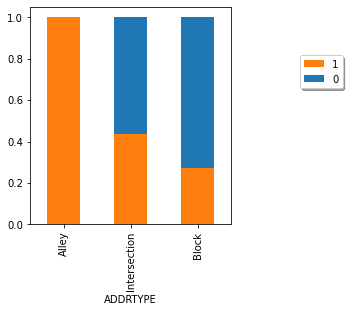

In [29]:
##bar chart to study relationship between ADDRTYPE and target SEVERITYCODE
tab = pd.crosstab(df.ADDRTYPE, df.SEVERITYCODE).apply(lambda r: r/r.sum(), axis=1).sort_values(by=[1],ascending=False)

columns_titles = [1,0]
tab=tab.reindex(columns=columns_titles)

ax = tab.plot(kind='bar', stacked=True, color=['tab:orange','tab:blue'])
chartBox = ax.get_position()
ax.set_position([chartBox.x0, chartBox.y0, chartBox.width*0.6, chartBox.height])
ax.legend(loc='upper center', bbox_to_anchor=(1.45, 0.8), shadow=True, ncol=1)
plt.show()

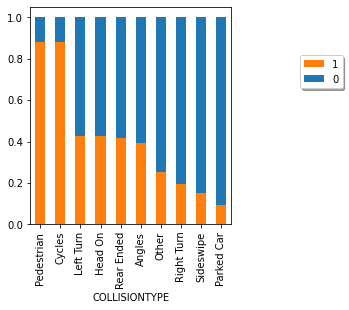

In [30]:
##bar chart to study relationship between COLLISIONTYPE and target SEVERITYCODE
tab = pd.crosstab(df.COLLISIONTYPE, df.SEVERITYCODE).apply(lambda r: r/r.sum(), axis=1).sort_values(by=[1],ascending=False)

columns_titles = [1,0]
tab=tab.reindex(columns=columns_titles)

ax = tab.plot(kind='bar', stacked=True, color=['tab:orange','tab:blue'])
chartBox = ax.get_position()
ax.set_position([chartBox.x0, chartBox.y0, chartBox.width*0.6, chartBox.height])
ax.legend(loc='upper center', bbox_to_anchor=(1.45, 0.8), shadow=True, ncol=1)
plt.show()

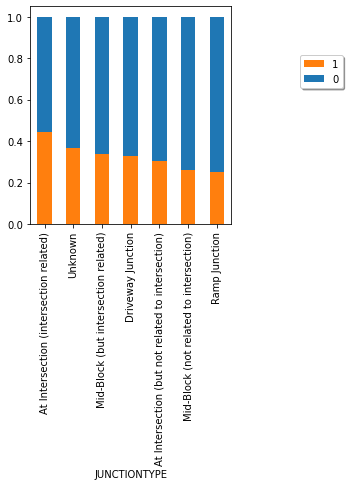

In [31]:
##bar chart to study relationship between JUNCTIONTYPE and target SEVERITYCODE
tab = pd.crosstab(df.JUNCTIONTYPE, df.SEVERITYCODE).apply(lambda r: r/r.sum(), axis=1).sort_values(by=[1],ascending=False)

columns_titles = [1,0]
tab=tab.reindex(columns=columns_titles)

ax = tab.plot(kind='bar', stacked=True, color=['tab:orange','tab:blue'])
chartBox = ax.get_position()
ax.set_position([chartBox.x0, chartBox.y0, chartBox.width*0.6, chartBox.height])
ax.legend(loc='upper center', bbox_to_anchor=(1.45, 0.8), shadow=True, ncol=1)
plt.show()

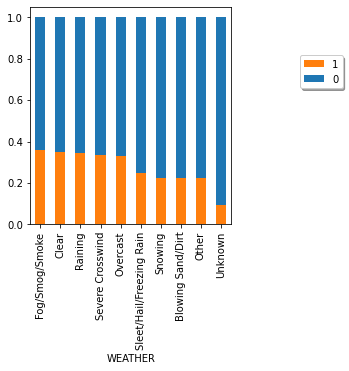

In [32]:
##bar chart to study relationship between WEATHER and target SEVERITYCODE
tab = pd.crosstab(df.WEATHER, df.SEVERITYCODE).apply(lambda r: r/r.sum(), axis=1).sort_values(by=[1],ascending=False)

columns_titles = [1,0]
tab=tab.reindex(columns=columns_titles)

ax = tab.plot(kind='bar', stacked=True, color=['tab:orange','tab:blue'])
chartBox = ax.get_position()
ax.set_position([chartBox.x0, chartBox.y0, chartBox.width*0.6, chartBox.height])
ax.legend(loc='upper center', bbox_to_anchor=(1.45, 0.8), shadow=True, ncol=1)
plt.show()

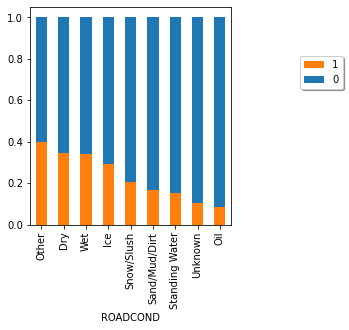

In [33]:
##bar chart to study relationship between ROADCOND and target SEVERITYCODE
tab = pd.crosstab(df.ROADCOND, df.SEVERITYCODE).apply(lambda r: r/r.sum(), axis=1).sort_values(by=[1],ascending=False)

columns_titles = [1,0]
tab=tab.reindex(columns=columns_titles)

ax = tab.plot(kind='bar', stacked=True, color=['tab:orange','tab:blue'])
chartBox = ax.get_position()
ax.set_position([chartBox.x0, chartBox.y0, chartBox.width*0.6, chartBox.height])
ax.legend(loc='upper center', bbox_to_anchor=(1.45, 0.8), shadow=True, ncol=1)
plt.show()

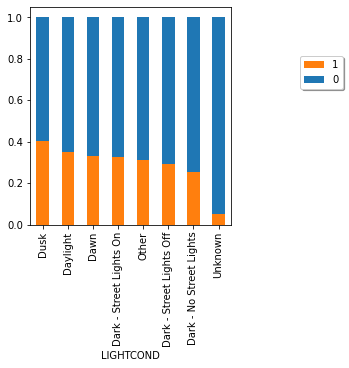

In [34]:
##bar chart to study relationship between LIGHTCOND and target SEVERITYCODE
tab = pd.crosstab(df.LIGHTCOND, df.SEVERITYCODE).apply(lambda r: r/r.sum(), axis=1).sort_values(by=[1],ascending=False)

columns_titles = [1,0]
tab=tab.reindex(columns=columns_titles)

ax = tab.plot(kind='bar', stacked=True, color=['tab:orange','tab:blue'])
chartBox = ax.get_position()
ax.set_position([chartBox.x0, chartBox.y0, chartBox.width*0.6, chartBox.height])
ax.legend(loc='upper center', bbox_to_anchor=(1.45, 0.8), shadow=True, ncol=1)
plt.show()

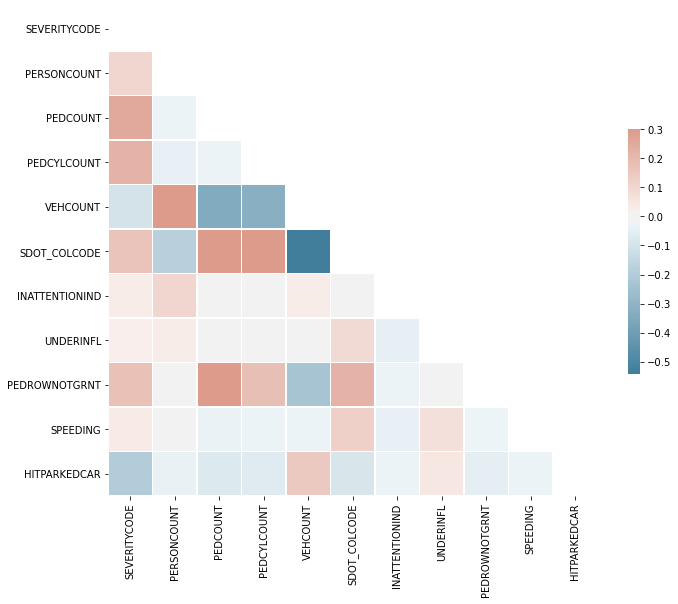

In [35]:
##study correlation of numerical variables to make sure no multicollinearity

# Compute the correlation matrix
corr = df.corr()

# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr, dtype=bool))

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(230, 20, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

# Predictive Model

In [36]:
##convert categorical variables to dummies
df = pd.get_dummies(df, columns=['ADDRTYPE', 'COLLISIONTYPE','JUNCTIONTYPE','SDOT_COLCODE','WEATHER','ROADCOND','LIGHTCOND','ST_COLCODE'])

In [37]:
df.head()

,SEVERITYCODE,PERSONCOUNT,PEDCOUNT,PEDCYLCOUNT,VEHCOUNT,INATTENTIONIND,UNDERINFL,PEDROWNOTGRNT,SPEEDING,HITPARKEDCAR,...,ST_COLCODE_72,ST_COLCODE_73,ST_COLCODE_74,ST_COLCODE_8,ST_COLCODE_81,ST_COLCODE_82,ST_COLCODE_83,ST_COLCODE_84,ST_COLCODE_85,ST_COLCODE_88
5,0,2,0,0,2,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
25,1,2,0,1,1,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
35,0,2,0,0,2,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
45,0,2,0,0,2,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
58,1,3,0,0,2,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [38]:
##study all columns including new dummies

for col in df.columns: 
    print(col) 

SEVERITYCODE
PERSONCOUNT
PEDCOUNT
PEDCYLCOUNT
VEHCOUNT
INATTENTIONIND
UNDERINFL
PEDROWNOTGRNT
SPEEDING
HITPARKEDCAR
ADDRTYPE_Alley
ADDRTYPE_Block
ADDRTYPE_Intersection
COLLISIONTYPE_Angles
COLLISIONTYPE_Cycles
COLLISIONTYPE_Head On
COLLISIONTYPE_Left Turn
COLLISIONTYPE_Other
COLLISIONTYPE_Parked Car
COLLISIONTYPE_Pedestrian
COLLISIONTYPE_Rear Ended
COLLISIONTYPE_Right Turn
COLLISIONTYPE_Sideswipe
JUNCTIONTYPE_At Intersection (but not related to intersection)
JUNCTIONTYPE_At Intersection (intersection related)
JUNCTIONTYPE_Driveway Junction
JUNCTIONTYPE_Mid-Block (but intersection related)
JUNCTIONTYPE_Mid-Block (not related to intersection)
JUNCTIONTYPE_Ramp Junction
JUNCTIONTYPE_Unknown
SDOT_COLCODE_11
SDOT_COLCODE_12
SDOT_COLCODE_13
SDOT_COLCODE_14
SDOT_COLCODE_15
SDOT_COLCODE_16
SDOT_COLCODE_18
SDOT_COLCODE_21
SDOT_COLCODE_22
SDOT_COLCODE_23
SDOT_COLCODE_24
SDOT_COLCODE_25
SDOT_COLCODE_26
SDOT_COLCODE_27
SDOT_COLCODE_28
SDOT_COLCODE_29
SDOT_COLCODE_31
SDOT_COLCODE_32
SDOT_COLCODE_33

In [39]:
##split data into train and test set

from sklearn.model_selection import train_test_split

y = df.SEVERITYCODE
X = df.drop('SEVERITYCODE',axis=1)
X= preprocessing.StandardScaler().fit(X).transform(X)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=3)

print ('Train set:', X_train.shape,  y_train.shape)
print ('Test set:', X_test.shape,  y_test.shape)

Train set: (19752, 138) (19752,)
Test set: (8466, 138) (8466,)


# Model: KNN

In [40]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics

Ks = 10
mean_acc = np.zeros((Ks-1))
std_acc = np.zeros((Ks-1))
ConfustionMx = [];
for n in range(1,Ks):
    
    #Train Model and Predict  
    neigh = KNeighborsClassifier(n_neighbors = n).fit(X_train,y_train)
    yhat=neigh.predict(X_test)
    mean_acc[n-1] = metrics.accuracy_score(y_test, yhat)

    
    std_acc[n-1]=np.std(yhat==y_test)/np.sqrt(yhat.shape[0])

mean_acc

array([0.64032601, 0.69076305, 0.66902906, 0.70257501, 0.68521143,
       0.71226081, 0.70623671, 0.71686747, 0.70092133])

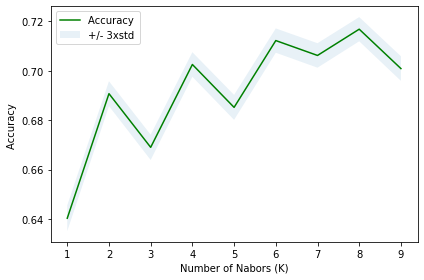

In [41]:
plt.plot(range(1,Ks),mean_acc,'g')
plt.fill_between(range(1,Ks),mean_acc - 1 * std_acc,mean_acc + 1 * std_acc, alpha=0.10)
plt.legend(('Accuracy ', '+/- 3xstd'))
plt.ylabel('Accuracy ')
plt.xlabel('Number of Nabors (K)')
plt.tight_layout()
plt.show()

In [42]:
print( "The best accuracy was with", mean_acc.max(), "with k=", mean_acc.argmax()+1) 

The best accuracy was with 0.7168674698795181 with k= 8


In [43]:
k = 8
#Train Model and Predict  
neigh = KNeighborsClassifier(n_neighbors = k).fit(X_train,y_train)

# Model: Decision Tree

In [44]:
from sklearn.tree import DecisionTreeClassifier

tree = DecisionTreeClassifier(criterion="entropy", max_depth = 6)
tree # it shows the default parameters

DecisionTreeClassifier(criterion='entropy', max_depth=6)

In [45]:
tree.fit(X_train,y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=6)

In [46]:
predTree = tree.predict(X_test)

print (predTree [0:5])
print (y_test [0:5])

[0 0 0 0 0]
184292    1
175574    1
161341    0
179013    0
192611    0
Name: SEVERITYCODE, dtype: int64


In [47]:
print("DecisionTrees's Accuracy: ", metrics.accuracy_score(y_test, predTree))

DecisionTrees's Accuracy:  0.7206472950626034


# Model: SVM

In [48]:
from sklearn import svm
clf = svm.SVC(kernel='rbf',probability=True)
clf.fit(X_train, y_train) 

SVC(probability=True)

In [49]:
yhat = clf.predict(X_test)
yhat [0:5]

array([0, 0, 0, 0, 0], dtype=int64)

In [50]:
print("SVM's Accuracy: ", metrics.accuracy_score(y_test, yhat))

SVM's Accuracy:  0.7228915662650602


# Model: Logistic Regression

In [51]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
LR = LogisticRegression(C=0.01, solver='liblinear').fit(X_train,y_train)
LR

LogisticRegression(C=0.01, solver='liblinear')

In [52]:
yhat = LR.predict(X_test)
yhat [0:5]

array([0, 1, 0, 0, 0], dtype=int64)

In [53]:
print("Logistic Regression's Accuracy: ", metrics.accuracy_score(y_test, yhat))

Logistic Regression's Accuracy:  0.7309236947791165


# Evaluate the Models

In [54]:
from sklearn.metrics import jaccard_score
from sklearn.metrics import f1_score
from sklearn.metrics import log_loss
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

In [55]:
#predict y values
y_predKNN = neigh.predict(X_test)
y_predTree = tree.predict(X_test)
y_predSVM = clf.predict(X_test)
y_predLR = LR.predict(X_test)

In [56]:
#get probability of y values
y_pred_probKNN = neigh.predict_proba(X_test)
y_pred_probTree = tree.predict_proba(X_test)
y_pred_probSVM = clf.predict_proba(X_test)
y_pred_probLR = LR.predict_proba(X_test)

In [57]:
##classification report for KNN
KNN_report = classification_report(y_test, y_predKNN)
print(KNN_report)

              precision    recall  f1-score   support

           0       0.74      0.89      0.81      5610
           1       0.64      0.37      0.47      2856

    accuracy                           0.72      8466
   macro avg       0.69      0.63      0.64      8466
weighted avg       0.70      0.72      0.69      8466



In [58]:
##classification report for Decision Tree
Tree_report = classification_report(y_test, y_predTree)
print(Tree_report)

              precision    recall  f1-score   support

           0       0.71      0.98      0.82      5610
           1       0.85      0.21      0.34      2856

    accuracy                           0.72      8466
   macro avg       0.78      0.60      0.58      8466
weighted avg       0.76      0.72      0.66      8466



In [59]:
##classification report for SVM
SVM_report = classification_report(y_test, y_predSVM)
print(SVM_report)

              precision    recall  f1-score   support

           0       0.71      0.97      0.82      5610
           1       0.79      0.24      0.37      2856

    accuracy                           0.72      8466
   macro avg       0.75      0.60      0.60      8466
weighted avg       0.74      0.72      0.67      8466



In [60]:
##classification report for Logistic Regression
LR_report = classification_report(y_test, y_predLR)
print(LR_report)

              precision    recall  f1-score   support

           0       0.73      0.94      0.82      5610
           1       0.73      0.32      0.45      2856

    accuracy                           0.73      8466
   macro avg       0.73      0.63      0.64      8466
weighted avg       0.73      0.73      0.70      8466



In [61]:
#Jaccard
print("KNN's Jaccard: ", jaccard_score(y_test, y_predKNN))
print("Decision Tree's Jaccard: ", jaccard_score(y_test, y_predTree))
print("SVM's Jaccard: ", jaccard_score(y_test, y_predSVM))
print("Logistic Regression's Jaccard: ", jaccard_score(y_test, y_predLR))

KNN's Jaccard:  0.30521739130434783
Decision Tree's Jaccard:  0.20236087689713322
SVM's Jaccard:  0.22727272727272727
Logistic Regression's Jaccard:  0.28879175772713084


In [62]:
#F1 score
print("KNN's F1-score: ", f1_score(y_test, y_predKNN, average='weighted'))
print("Decision Tree's F1-score: ", f1_score(y_test, y_predTree, average='weighted'))
print("SVM's F1-score: ", f1_score(y_test, y_predSVM, average='weighted'))
print("Logistic Regression's F1-score: ", f1_score(y_test, y_predLR, average='weighted'))

KNN's F1-score:  0.6926291781601623
Decision Tree's F1-score:  0.6589627813067431
SVM's F1-score:  0.6698772473913018
Logistic Regression's F1-score:  0.69594248487597


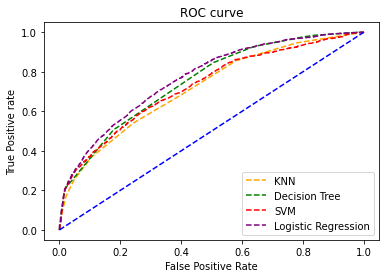

In [63]:
##plot the ROC curve

from sklearn.metrics import roc_curve

# roc curve for models
fpr1, tpr1, thresh1 = roc_curve(y_test, y_pred_probKNN[:,1], pos_label=1)
fpr2, tpr2, thresh2 = roc_curve(y_test, y_pred_probTree[:,1], pos_label=1)
fpr3, tpr3, thresh3 = roc_curve(y_test, y_pred_probSVM[:,1], pos_label=1)
fpr4, tpr4, thresh4 = roc_curve(y_test, y_pred_probLR[:,1], pos_label=1)

# roc curve for tpr = fpr 
random_probs = [0 for i in range(len(y_test))]
p_fpr, p_tpr, _ = roc_curve(y_test, random_probs, pos_label=1)

# plot roc curves
plt.plot(fpr1, tpr1, linestyle='--',color='orange', label='KNN')
plt.plot(fpr2, tpr2, linestyle='--',color='green', label='Decision Tree')
plt.plot(fpr3, tpr3, linestyle='--',color='red', label='SVM')
plt.plot(fpr4, tpr4, linestyle='--',color='purple', label='Logistic Regression')
plt.plot(p_fpr, p_tpr, linestyle='--', color='blue')
# title
plt.title('ROC curve')
# x label
plt.xlabel('False Positive Rate')
# y label
plt.ylabel('True Positive rate')

plt.legend(loc='best')
plt.savefig('ROC',dpi=300)
plt.show();

In [64]:
##calculate area under the curve

from sklearn.metrics import roc_auc_score

# auc scores
print("KNN's AUC: ", roc_auc_score(y_test, y_pred_probKNN[:,1]))
print("Decision Tree's AUC: ", roc_auc_score(y_test, y_pred_probTree[:,1]))
print("SVM's AUC: ", roc_auc_score(y_test, y_pred_probSVM[:,1]))
print("Logistic Regression's AUC: ", roc_auc_score(y_test, y_pred_probLR[:,1]))

KNN's AUC:  0.716874753466449
Decision Tree's AUC:  0.7503959516070243
SVM's AUC:  0.7265916393295285
Logistic Regression's AUC:  0.7680164534619551


# Logistic Regression seems to be the best model